In [1]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import lineid_plot
from ramandecompy import spectrafit
from ramandecompy import peakidentify
from ramandecompy import dataprep
from ramandecompy import datavis
from ramandecompy import dataimport
from ramandecompy import machine_learning
from scipy import interpolate

In [2]:
dataprep.new_hdf5('supervised_calibration_dataset')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/water.xlsx', 'water')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx', 'hydrogen')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx', 'methane')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx', 'carbon monoxide')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CO2_100wt%.csv', 'carbon dioxide')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/sapphire.xlsx', 'sapphire')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Propane_test.xlsx', 'Propane')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Ethane_test.xlsx', 'Ethane')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Acetaldehyde_test.xlsx', 'Acetaldehyde')

Data from ../ramandecompy/tests/test_files/water.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CO2_100wt%.csv fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/sapphire.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_fil

In [3]:
dataprep.view_hdf5('supervised_calibration_dataset.hdf5')

**** supervised_calibration_dataset.hdf5 ****
Acetaldehyde
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    counts
|    residuals
|    wavenumber
Ethane
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
Propane
|    Peak_01
|    counts
|    residuals
|    wavenumber
carbon dioxide
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
carbon monoxide
|    Peak_01
|    counts
|    residuals
|    wavenumber
hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
methane
|    Peak_01
|    counts
|    residuals
|    wavenumber
sapphire
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
water
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber


# Interpolated calibration dataset

In [4]:
dataprep.new_hdf5('supervised_calibration_interp')

In [5]:
dataprep.view_hdf5('supervised_calibration_interp.hdf5')

**** supervised_calibration_interp.hdf5 ****


In [6]:
hdf5_interpfilename = 'supervised_calibration_interp.hdf5'
# first a function that will return a normalized interpolated spectra
target_compound = 'water'
# compound = 'water'
hdf5_calfilename = 'supervised_calibration_dataset.hdf5'
spectra_count = 1
def interpolated_spectra(hdf5_interpfilename, hdf5_calfilename, spectra_count):
    hdf5 = h5py.File(hdf5_calfilename, 'r+')
    # get list of compounds from hdf5 file
    y_data_list = []
    x_data_list = []
    frames = []
    compound_list = list(hdf5.keys())
    print(compound_list)
    for _, target_compound in enumerate(compound_list):
        x_data, y_data, labels = machine_learning.generate_spectra_dataset(hdf5_calfilename, target_compound, spectra_count)
        y_data_list.append(y_data)
        x_data_list.append(x_data)
        for i, label in enumerate(labels):
            interplist=machine_learning.combine_experiment(hdf5_interpfilename, 'interp_'+target_compound, x_data, y_data, label, i) 
            frames.append(interplist)
    return frames

['Acetaldehyde', 'Ethane', 'Propane', 'carbon dioxide', 'carbon monoxide', 'hydrogen', 'methane', 'sapphire', 'water']
interp_Acetaldehyde/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_interp.hdf5.
interp_Ethane/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_interp.hdf5.
interp_Propane/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_interp.hdf5.
interp_carbon dioxide/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_interp.hdf5.
interp_carbon monoxide/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_interp.hdf5.
interp_hydrogen/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_interp.hdf5.
interp_methane/0/residuals
Data f

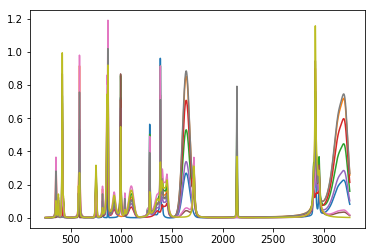

In [7]:
frames = interpolated_spectra(hdf5_interpfilename, hdf5_calfilename, spectra_count)

In [8]:
frames

[None, None, None, None, None, None, None, None, None]

In [9]:
key_list = machine_learning.keyfinder(hdf5_interpfilename)
print(key_list)

['interp_Acetaldehyde/0', 'interp_Ethane/0', 'interp_Propane/0', 'interp_carbon dioxide/0', 'interp_carbon monoxide/0', 'interp_hydrogen/0', 'interp_methane/0', 'interp_sapphire/0', 'interp_water/0']


In [10]:
df = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
      keys=None, levels=None, names=None, verify_integrity=False,
      copy=True,sort=True)
df

ValueError: All objects passed were None

# SAVE your hdf5 file before continuing 

In [ ]:
hdf5_calfilename = 'supervised_calibration_dataset.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'supervised_calibration_interp.hdf5'
frames = []
for i,key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 10, plot =False)
    frames.append(df)

In [ ]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [ ]:
cal = pd.DataFrame()

In [ ]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
cal['fraction']= result[:][0]
cal['sigma']= result[:][1]
# dat['center']= result[:][2]
cal['amplitude']= result[:][3]
cal['fwhm']= result[:][4]
cal['height']= result[:][5]
cal['auc']= result[:][6]
cal['labelencoded']=le.fit_transform(result[:][7])
cal['labels']= result[:][7]
cal['center']= result[:][2]

In [ ]:
cal

# Experimental dataset

In [ ]:
dataprep.view_hdf5('dataimport_ML_df-Copy1.hdf5')

In [ ]:
key_list = machine_learning.keyfinder('dataimport_ML_df-Copy1.hdf5')
key_list

In [ ]:
hdf5_calfilename = 'supervised_calibration_dataset.hdf5' 
hdf5_expfilename = 'dataimport_ML_df-Copy1.hdf5'
frames = []
for _, key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 10, plot =False)
    frames.append(df)

In [ ]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [ ]:
dat = pd.DataFrame()

In [ ]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
dat['fraction']= result[:][0]
dat['sigma']= result[:][1]
# dat['center']= result[:][2]
dat['amplitude']= result[:][3]
dat['fwhm']= result[:][4]
dat['height']= result[:][5]
dat['auc']= result[:][6]
dat['labelencoded']=le.fit_transform(result[:][7])
dat['labels']= result[:][7]
dat['center']= result[:][2]

In [ ]:
dat

In [ ]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc','labelencoded']
X_train=cal[inputs]
y_train = cal['center']
X_test=dat[inputs]
y_test= dat['center']

# Logistic Regression

In [ ]:
x_data_list[0]

In [ ]:
from sklearn.model_selection import train_test_split

# divide and extract test/train and validation data

X_train, X_test, y_train, y_test = train_test_split(y_data_list[0], labels, test_size=0.2)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X_train, y_train)

# get predictions
Z = logreg.predict(X_test)

logreg.score(X_test, y_test)

In [ ]:



fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x_data, y_data, label='data')
# ax.scatter(X_train, y_train, label='train')
# ax.scatter(X_test, y_test, label='teste')
# ax.scatter(X_test, regr.predict(X_test), label='predicted')

# fig, ax = plt.subplots(figsize=(5, 3))
# y = dat['fraction'].values
# x = dat['height'].values
# # Create the linear regression model
# LogRegr = linear_model.LogisticRegression() 
# # plotting the balance
# ax.scatter(dat['height'], dat['fraction'], label = 'balance default',color='r')

# # fit the linear model 
# LogRegr.fit(x.reshape(-1,1),y.reshape(-1,1))
# xres = np.array(x).reshape(-1,1)
# plt.plot(x,LogRegr.predict_proba(xres)[:,1],'o',label = 'fit')
# # Find the coefficients B0 and B1
# print('B0, B1: ',LogRegr.intercept_, LogRegr.coef_[0])
# ax.set_ylabel('Probability Default')
# ax.set_xlabel('Balance')
# ax.set_title('Probability Default vs. Balance')
plt.legend()

# Multiple Linear regression

In [ ]:
numdescriptors = 8
# train linear model of descriptors
yrange =  np.arange(1,numdescriptors,1)
for Y in yrange:
    MLR=linear_model.LinearRegression()
    MLR.fit(train[train.columns.values[0:Y]],train[train.columns.values[Y]])
    # WE are going to train using the first 8 values

    # make predictions on test and train set 
    trainpred=MLR.predict(train[train.columns.values[0:Y]])
    # predict the outputs using the training dataset
    testpred=MLR.predict(test[train.columns.values[0:Y]])
    # predict using test dataset
    #make parity plot 
    maxlimit  = train[train.columns.values[Y]].max()

    plt.figure(figsize=(7,7))
    plt.xlim([0,maxlimit]);
    plt.ylim([0,maxlimit]);
    print('This is for Y ='+str(Y))
    plt.scatter(train[train.columns.values[Y]],trainpred, label='Training')
    plt.scatter(test[train.columns.values[Y]],testpred,color='r', label='Test')
    plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
    plt.legend()
    plt.xlabel('Actual Output')
    plt.ylabel('Predicted Output')

    #calculate the test and train error
    
    print("Train error",mean_squared_error(train[train.columns.values[Y]],trainpred)) # MSE of training dataset
    print("Test error",mean_squared_error(test[train.columns.values[Y]],testpred))
    # usually the training error is less than the test error